# Flipkart Customer Reviews

Dataset Source: [Kaggle](https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset)

## <b>Exploratory Data Analysis</b>

<br><br><br>

## Libraries and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud 

import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flipkart Product Reviews - Kaggle/Dataset-SA.csv')
data['sentiment_code'] = pd.Categorical(data.Sentiment).codes
data['sentiment_code'] = data['sentiment_code'].astype('Int64')
data.dropna(inplace = True)


### Data Prepocessing

In [ ]:
data.product_price.unique()

In [5]:
data['product_price'] = pd.to_numeric(data['product_price'], errors='coerce')
data.dropna(inplace = True)
data['product_price'].describe()

count    180376.000000
mean       4620.764104
std       10439.043652
min          59.000000
25%         350.000000
50%         980.000000
75%        3569.000000
max       86990.000000
Name: product_price, dtype: float64

In [6]:
data['price_category'] = pd.cut(data.product_price, bins = [0, 10000, 50000, 100000], labels = ['low_spend', 'medium_spend', 'high_spend'])

[Text(0.5, 1.0, 'Sentiment counts per product price category')]

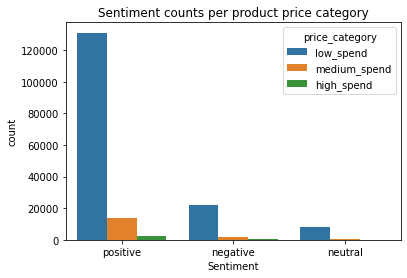

In [8]:
# Sentiment counts per product price category

sns.countplot(data = data, x = 'Sentiment', hue = 'price_category').set(title='Sentiment counts per product price category')

# Medium spend category has majority positive reviews

In [96]:
# Pre-processing and cleaning text

stop = stopwords.words('english')
add_stopwords = ['aqua', 'black', 'blue', 'fuchsia', 'gray', 'green', 'lime', 'maroon', 'navy', 'olive', 'purple', 'red', 'silver', 'teal', 'white', 'yellow', 'pack', 'light', 'product']
stop.extend(add_stopwords)

lemmatizer = WordNetLemmatizer()


def clean_text(text):

  text = text.lower()
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) # Punctuations, URLs and @
  text = " ".join([word for word in text.split() if word not in (stop)]) # Stopwords
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split()]) # Stemming
  
  return(text)



In [97]:
data_sub = data[['product_name', 'Summary']].copy(deep = True)
data_sub = data_sub.applymap(clean_text)
data_sub

,product_name,Summary
0,candes 12 l roompersonal air coolerwhite elega...,great cooler excellent air flow price amazing ...
1,candes 12 l roompersonal air coolerwhite elega...,best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air coolerwhite elega...,quality good power air decent
3,candes 12 l roompersonal air coolerwhite elega...,bad fan
4,candes 12 l roompersonal air coolerwhite elega...,ok ok
...,...,...
205047,cello 18 opalware cello dazzle lush fiesta opa...,good
205048,cello 18 opalware cello dazzle lush fiesta opa...,nice
205049,cello 18 opalware cello dazzle lush fiesta opa...,nice fast delivery
205050,cello 18 opalware cello dazzle lush fiesta opa...,awesome


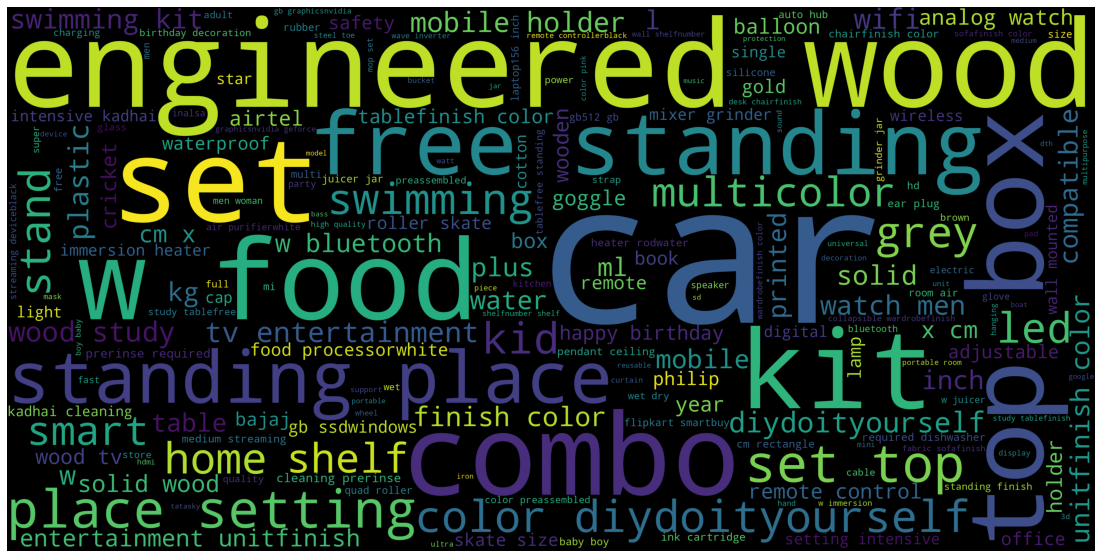

In [79]:
# Wordcloud Product Names

wordcloud_product = WordCloud(width=4000, height=2000).generate(' '.join(data_sub['product_name'].unique()))
# Generate plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_product)
plt.axis("off")
plt.show()

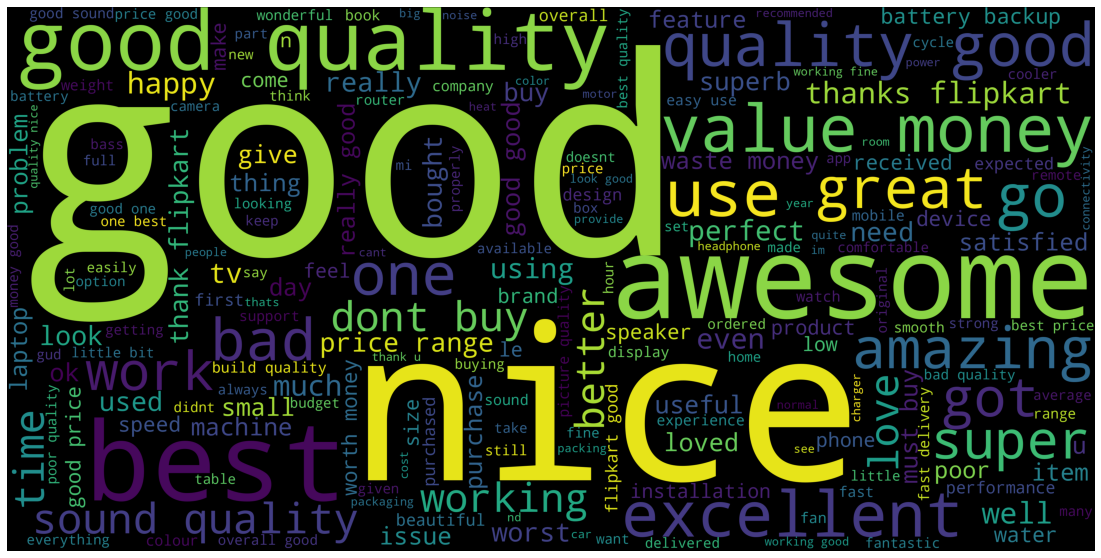

In [98]:
# Wordcloud Summary

wordcloud_summary = WordCloud(width=4000, height=2000).generate(' '.join(data_sub['Summary'].unique()))
# Generate plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.show()